# Student Performance with Multiple Linear Regression

# About Dataset

**Description:**
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

**Variables:**

**Hours Studied:** The total number of hours spent studying by each student.

**Previous Scores:** The scores obtained by students in previous tests.

**Extracurricular Activities:** Whether the student participates in extracurricular 
activities (Yes or No).

**Sleep Hours:** The average number of hours of sleep the student had per day.

**Sample Question Papers Practiced:** The number of sample question papers the student practiced.

**Target Variable:**

**Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

- The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


# Read Data Set

In [3]:
df = pd.read_csv("/USERS/ADMIN/CE/SAA/REGRESION_LINEAL/multiple/Student_Performance (1).csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# Data Preparation - EDA

In [94]:
df.shape

(10000, 6)

In [4]:
df.tail(10)

#El comando df.tail(10) se usa en Python, generalmente con la biblioteca pandas, para mostrar las últimas 10 filas de un DataFrame llamado df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9990,9,43,No,7,4,40.0
9991,5,97,Yes,7,4,83.0
9992,9,52,No,9,7,50.0
9993,9,58,Yes,7,7,55.0
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.isnull().sum()


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [98]:
df.describe().T 



,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


En aquest grafic podem veure que  les dades no estan tan allunyades de la mitjana, aixo significa que no hi ha tanta diferencia entre
els valors de les variables

## Relationship Between Hours Studied and Performance Index

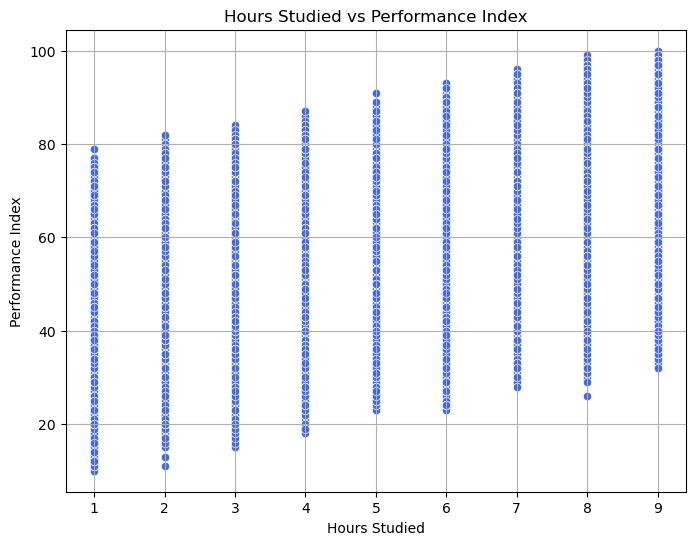

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours Studied', y='Performance Index', data=df, color='royalblue')
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

En aquest gráfic podem veure una tendencia ascendent, és a dir que com mes hores ha dormit la persona mes nota obtindra. 
Es lógic aquest fet, la pregunta es sí pot ser que apartir de alguna hora els estudiants no treguin tantes bones notes.


## Sleep Hours Distribution:

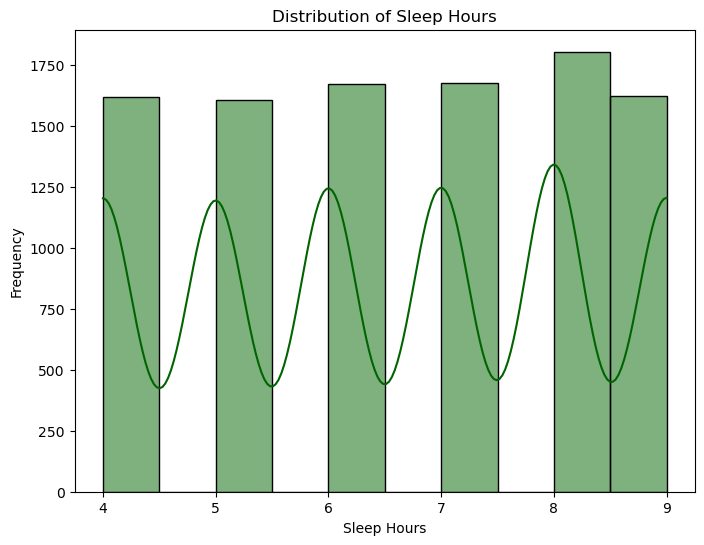

In [8]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep Hours'], kde=True, color='darkgreen', bins=10)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

en aquest grafic podem veure que les dades de la variable sleep hours esta bastant ben representat ja que obtenim frecuancias molt 
semblants per cada hora

## Previous Scores and Performance Index Relationship

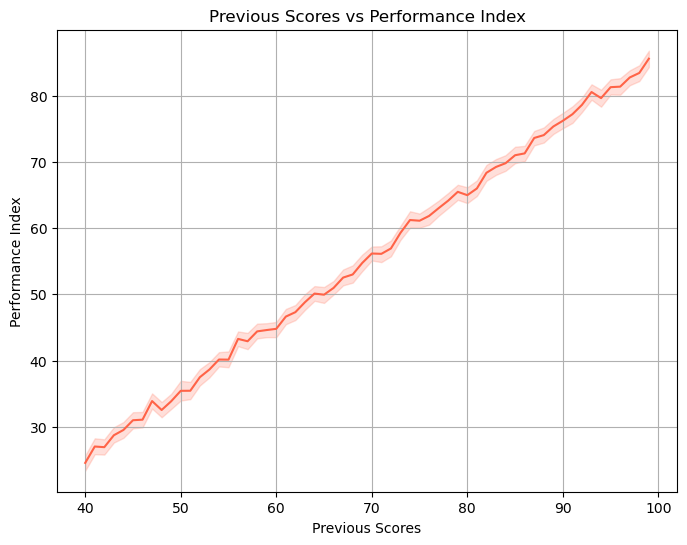

In [11]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Previous Scores', y='Performance Index', data=df, color='tomato')
plt.title('Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()

In [ ]:
En aquest gràfic de lineas podem observar que els les notes anteriors respecte a les posteriors estan molt relacionades, de fet podem observar una linea 
continua indicant que les notes posteriors estan molt relacionades al rendiment academic de les persones, pero tot i així pot haver algun cas puntual, on el 
alumnat hagi tingut un mal dia.

## Relationship Between Extracurricular Activities and Performance Index

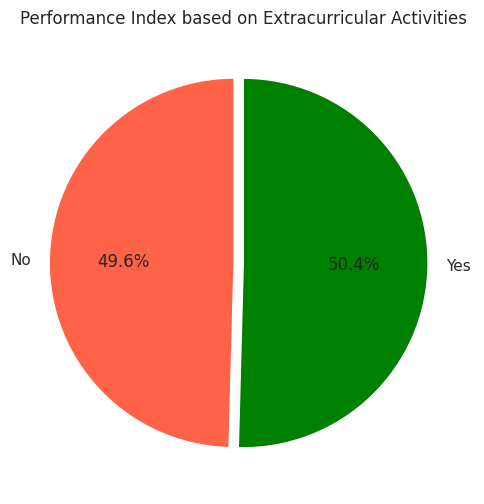

In [102]:
pie_data = df.groupby('Extracurricular Activities')['Performance Index'].mean()
plt.figure(figsize=(8, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', colors=['tomato', 'green'], startangle=90, explode=(0.05, 0))  # explode ile dilimlerden birini ayırabilirsiniz
plt.title('Performance Index based on Extracurricular Activities')
plt.show()

Aquest grafic en format de pizza o pastis el que fa es dividir en dos categories els que fan exta activitats y els que no, afegint el promig de les notes,
aixo significa que si una part té mes incidencia que una altre pdoriem dir que treuen millors notes o no, pero en aquest cas no hi ha molta diferencia.
Per tan podriem observar que la variable de fer una extracurricular no es un factor que determini la meva variable objectiu.

## Sample Question Papers Practiced and Performance Index Relationship

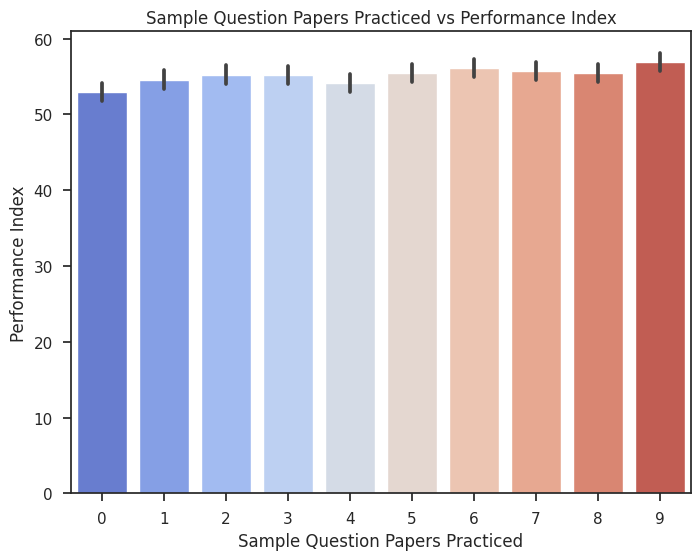

In [103]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sample Question Papers Practiced', y='Performance Index', data=df, palette='coolwarm')
plt.title('Sample Question Papers Practiced vs Performance Index')
plt.xlabel('Sample Question Papers Practiced')
plt.ylabel('Performance Index')
plt.show()

In [ ]:
En aquest grafic de barras, podem veure que la variable de practiques no té molt significat ja que com mes practiques fas no indica una correlació de 
aconseguir millor nota, de fet podem veure algun exemple com es el cas de les persones que han fet 8 practiques a comparació de les de 2 i 3 i podem observar 
que no tenen 

In [13]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Es important abans d'aplicar un model observar les dades per poguerles utilitzar en segons quin model, en aquest cas al fer regressió lineal el extra
activitats l'hem de transformar en una variable numerica, en aquest cas discreta


In [14]:
# Convert Yes and No to numeric format
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df.sample(3)

#La función .map() se usa para reemplazar valores específicos en la columna.

#Aquí, {'Yes': 1, 'No': 0} es un diccionario que indica que


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
1095,3,83,0,7,5,65.0
2636,1,97,1,8,7,73.0
4203,4,44,1,6,0,29.0


In [15]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [107]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


en aquestes correlacions podem veure que las notas anteriors esta molt relacionat amb el index de les notes, tambe les hores estudiades estan molt 
relacionades, y llavors los hores de dormir i les practiques tenen una correlació semblant , podria ser que que les hores dormides estiguin en una mitjana
correcte, és a dir en un altre estudi que hi haguessin dades mes desbalancejades podriem veure una correlació mes forta, tambe podem observar que les 
practiques podrien no estar molt adaptades al temari o als examens, y per ultim les extra activitats no tenen molta relació.


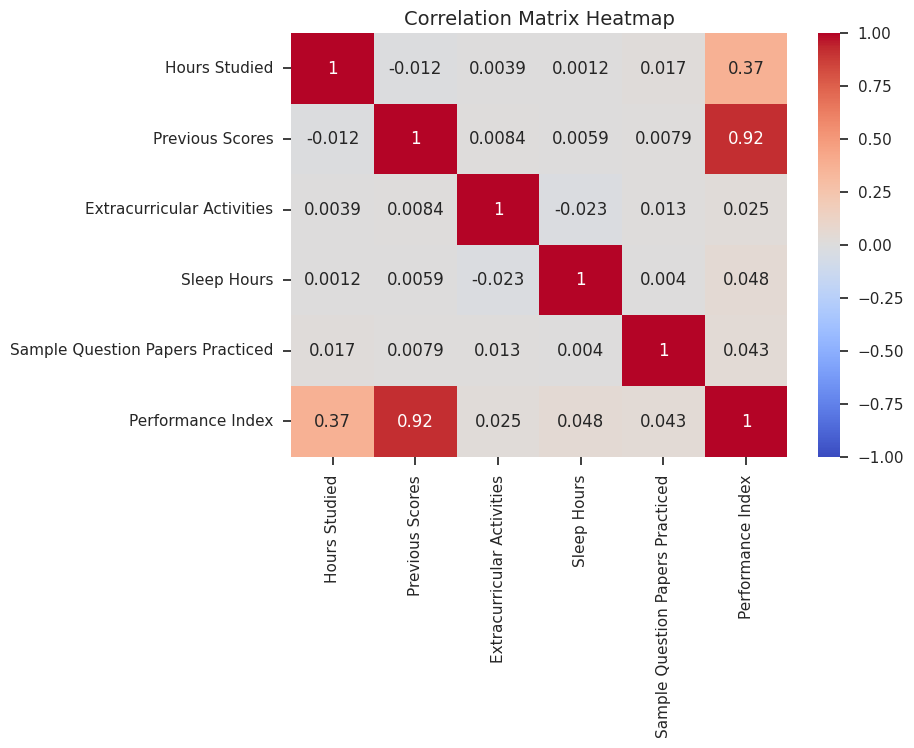

In [108]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

# Train-Test Split

In [20]:

# el que fa el codic es agafar totes las variables menys la objectiu per la x y defineix y per la variable objectiu
X = df.drop(columns="Performance Index")
y = df["Performance Index"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
#separa les dades amb un 70% train y 30% test

In [22]:
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (7000, 5)
y_train (7000,)
X_test (3000, 5)
y_test (3000,)


# Model

In [28]:
mlr = LinearRegression()



LinearRegression():
Es un modelo de regresión lineal de scikit-learn que ajusta una línea recta (o un plano, en el caso de múltiples variables) a los datos para predecir un valor continuo de una variable dependiente en función de una o más variables independientes.
mlr = ...:
Al definir mlr = LinearRegression(), estás creando una instancia del modelo de regresión lineal y asignándola a la variable mlr. Esta instancia (mlr) se usará para entrenar el modelo con tus datos y hacer predicciones.

In [29]:
mlr.fit(X_train,y_train)

LinearRegression()

In [36]:
y_test_pred = mlr.predict(X_test) 
y_test_pred
#este te enseña de la variable objetivo los valores predecidos

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

In [37]:
mlr.coef_
#~esto sirve para ver el modelo los pendientes si son positivos significa que hay una tendencia positiva

array([2.85895223, 1.01551979, 0.58171285, 0.47967676, 0.19039416])

In [116]:
mlr.feature_names_in_

array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'], dtype=object)

In [117]:
mlr.intercept_

-33.836543807141744

In [38]:
# Create DataFrames for testing datasets

test_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_test_pred.ravel(), "Residual":y_test - y_test_pred, 'Dataset': 'Testing'})
#sirve basicamente para comparar los valroes reales con los predichos y la diferencia del error.

C:\Users\Admin\AppData\Local\Temp\ipykernel_15752\3364463796.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  test_data = pd.DataFrame({'Actual': y_test.ravel(), 'Predicted': y_test_pred.ravel(), "Residual":y_test - y_test_pred, 'Dataset': 'Testing'})


In [42]:
test_data_sample = test_data.sample(15)
test_data_sample

#muestra 15 muestras solo

,Actual,Predicted,Residual,Dataset
6998,34.0,33.976809,0.023191,Testing
9829,80.0,80.103089,-0.103089,Testing
4067,43.0,44.772312,-1.772312,Testing
8611,45.0,46.269317,-1.269317,Testing
5554,31.0,30.461103,0.538897,Testing
4151,93.0,94.240008,-1.240008,Testing
8782,71.0,71.547189,-0.547189,Testing
4016,63.0,63.577215,-0.577215,Testing
1429,42.0,42.771038,-0.771038,Testing
2638,52.0,51.294024,0.705976,Testing


<function matplotlib.pyplot.show(close=None, block=None)>

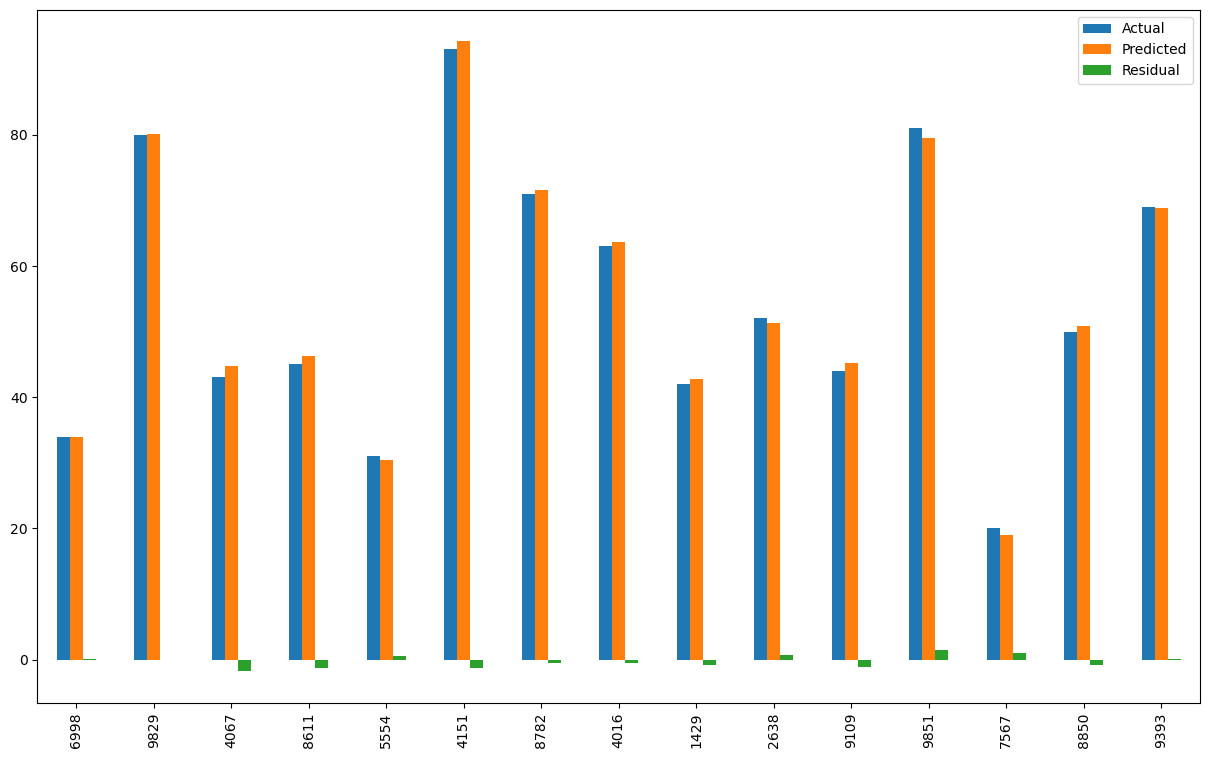

In [45]:
test_data_sample.plot(kind= "bar", figsize = (15,9))
plt.show

#muestra un grafico de  barras de una varaible que almacena una operacion 

# Error Metrics

In [121]:
  R2_score = r2_score(y_test, y_test_pred)
R2_score

0.9890110607021136

In [122]:
#  Calculating error metrics:

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [123]:
eval_metric(y_test, y_test_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9890110607021136
MAE 		: 1.6090437564045217
MSE 		: 4.066563824092682
RMSE 		: 2.0165722957763457


In [124]:
# Prediction results according to X
y_train_pred = mlr.predict(X_train)
y_train_pred

array([81.78589232, 80.18393722, 49.98815703, ..., 45.13907865,
       21.06892959, 22.61569669])

In [125]:
# Create DataFrames for training 

train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), "residual":y_train - y_train_pred, 'Dataset': 'Training'})
train_data

/tmp/ipykernel_247/2416289308.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  train_data = pd.DataFrame({'Actual': y_train.ravel(), 'Predicted': y_train_pred.ravel(), "residual":y_train - y_train_pred, 'Dataset': 'Training'})


,Actual,Predicted,residual,Dataset
9069,82.0,81.785892,0.214108,Training
2603,79.0,80.183937,-1.183937,Training
7738,50.0,49.988157,0.011843,Training
1579,81.0,82.496877,-1.496877,Training
5058,52.0,53.491140,-1.491140,Training
...,...,...,...,...
5734,48.0,44.413202,3.586798,Training
5191,51.0,51.542884,-0.542884,Training
5390,44.0,45.139079,-1.139079,Training
860,20.0,21.068930,-1.068930,Training


In [126]:
train_data_saple = train_data.sample(15)

<function matplotlib.pyplot.show(close=None, block=None)>

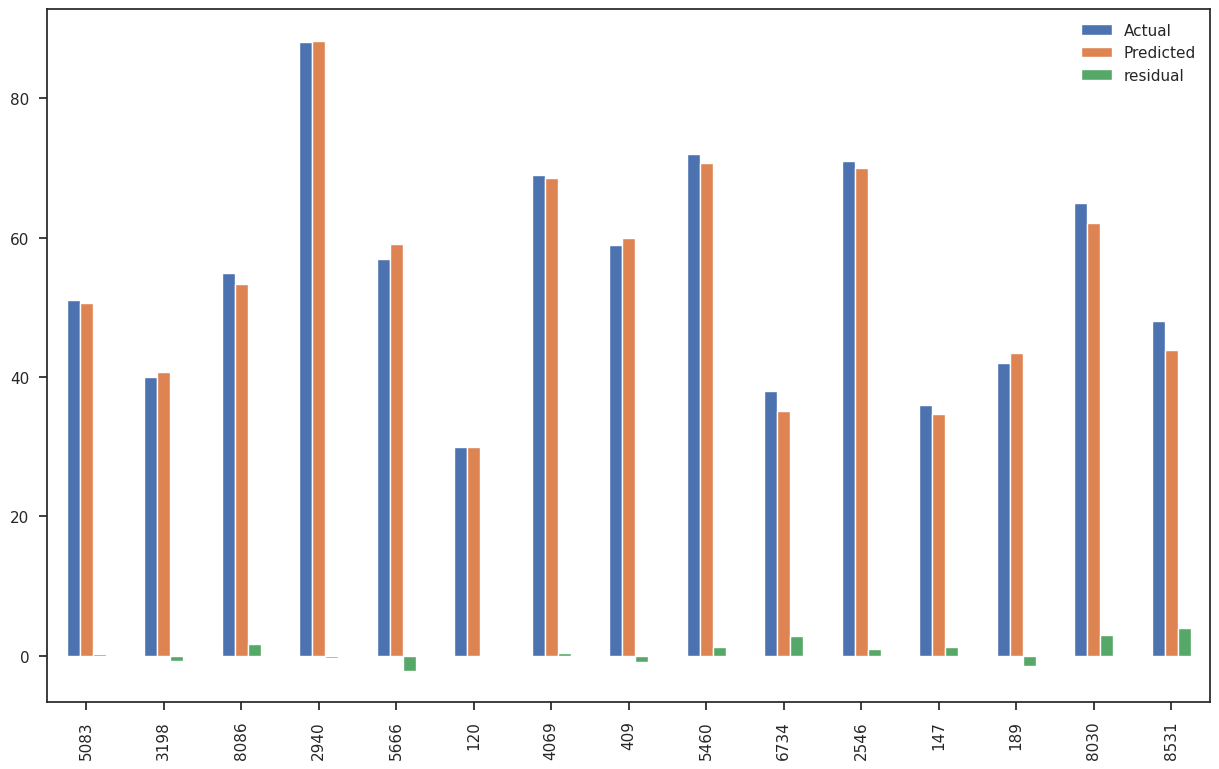

In [127]:
train_data_saple.plot(kind= "bar", figsize = (15,9))
plt.show

In [128]:
eval_metric(y_train, y_train_pred)


Model testing performance: 
---------------------------
R2_score 	: 0.9886221887978632
MAE 		: 1.6221030273588595
MSE 		: 4.193473712437295
RMSE 		: 2.0477972830427564


In [129]:
# Concatenate train and test DataFrames
combined_data = pd.concat([train_data, test_data], ignore_index=True)

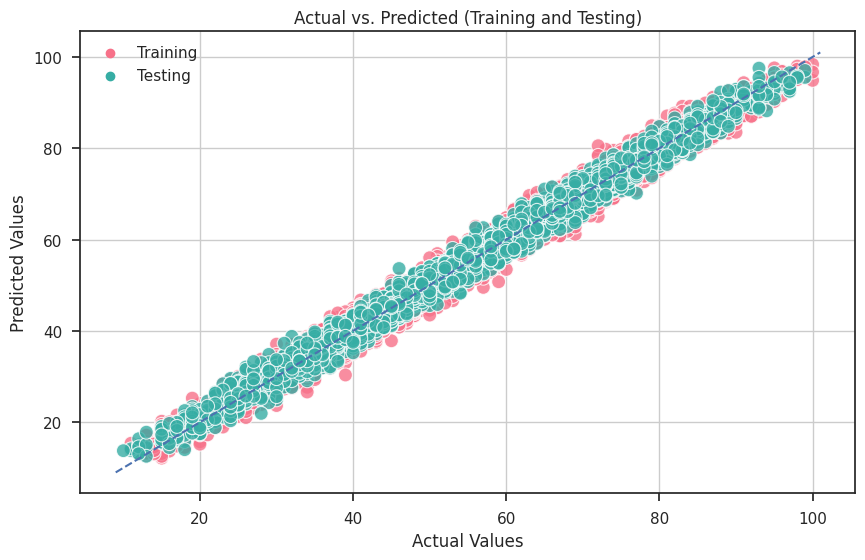

In [130]:
sns.set(style='ticks')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_data, s=100, alpha=0.8, palette='husl') 

plt.plot(
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 
    'b--' 
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')

plt.legend()
plt.grid(True)
plt.show()

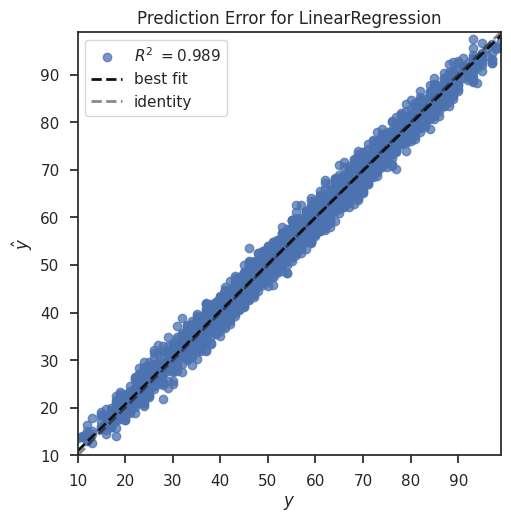

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [131]:
from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show() 